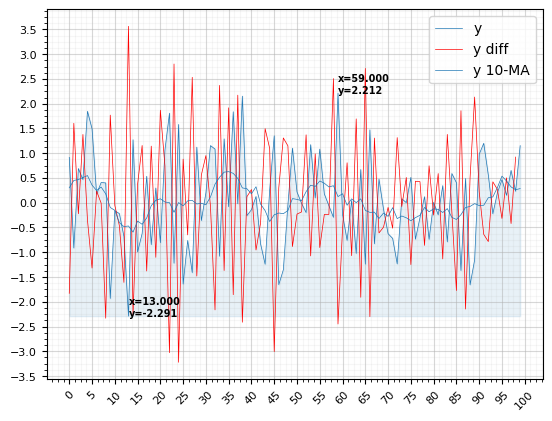

In [1]:
from typing import Any,Optional
from collections.abc import Sequence
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
from scipy.signal import convolve
import numpy as np
import torch
x = np.random.randn(100)


def axplot(
    ax: Axes,
    y,
    x=None,
    label=None,
    color:Optional[str]="tab:blue",
    linewidth=0.5,
    fill_alpha=None,
    fill_color=None,
    fill_min=None,
    show_min = False,
    show_max = False,
    diff_color=None,
    ma_len = None,
    ma_color = None,
    legend = True,
    **kwargs,
):
    if label is None: label = "y"

    # convert y to numpy
    if isinstance(y, torch.Tensor): y = y.detach().cpu().numpy()
    elif not isinstance(y, np.ndarray): y = np.array(y)

    # convert x to numpy
    if x is None: x = np.arange(len(y))
    elif isinstance(x, torch.Tensor): x = x.detach().cpu().numpy()
    elif not isinstance(x, np.ndarray): x = np.array(x)

    # plot
    ax.plot(x, y, label=label, color=color, linewidth=linewidth, **kwargs)

    # annotate min
    if show_min:
        minx, miny = x[np.argmin(y)], y.min()
        ax.text(minx, miny, f"x={minx:.3f}\ny={miny:.3f}", size=7, weight="bold")
    # annotate max
    if show_max:
        maxx, maxy = x[np.argmax(y)], y.max()
        ax.text(maxx, maxy, f"x={maxx:.3f}\ny={maxy:.3f}", size=7, weight="bold")

    # filling
    if fill_alpha:
        if fill_min is None: fill_min = y.min()
        if fill_color is None: fill_color = color
        ax.fill_between(x, fill_min, y, alpha=fill_alpha, color=fill_color)

    # gradient
    if diff_color is not None:
        diff_label = f"{label} diff"
        ax.plot(x[:-1], np.diff(y), label=diff_label, color=diff_color, linewidth=linewidth, **kwargs)

    # moving average
    if ma_len is not None:
        ma = convolve(y, np.ones(ma_len) / ma_len, mode="same")
        ma_label = f"{label} {ma_len}-MA"
        ax.plot(ma, label=ma_label, color=ma_color, linewidth=linewidth, **kwargs)

    # legend
    if legend and (label or diff_color or ma_len): ax.legend()

def axplot_style(
    ax: Axes,
    xlim=None,
    ylim=None,
    title=None,
    xlabel=None,
    ylabel=None,
    xticks=35,
    yticks=20,
    xminorticks=4,
    yminorticks=4,
    grid=True,
    xfontsize=8,
    yfontsize=8,
    xrot=45,
    yrot=0,
    tfms=(),
):
    # x,y limits
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)

    # set ticks
    if xticks: ax.xaxis.set_major_locator(MaxNLocator(nbins=xticks, steps=[1, 2, 2.5, 5, 10]))
    if xminorticks: ax.xaxis.set_minor_locator(AutoMinorLocator(xminorticks))
    if yticks: ax.yaxis.set_major_locator(MaxNLocator(nbins=yticks, steps=[1, 2, 2.5, 5, 10]))
    if yminorticks: ax.yaxis.set_minor_locator(AutoMinorLocator(yminorticks))
    # add grid
    if grid:
        ax.grid(which="minor", alpha=0.1)
        ax.grid(which="major", alpha=0.5)

    # fontsize
    if xfontsize: ax.tick_params(axis="x", labelsize=xfontsize, rotation=xrot)
    if yfontsize: ax.tick_params(axis="y", labelsize=yfontsize, rotation=yrot)

    # labels
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    if title: ax.set_title(title)

    # custom tfms
    for tfm in tfms:
        tfm(ax)


fig, ax = plt.subplots(1)
axplot(ax, x, fill_alpha=0.1, diff_color="r", show_min=True, show_max=True, ma_len=10)
axplot_style(ax)